In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
# data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
# y_cols = list(data_df_full.columns[8:])
# cols = y_cols.copy()
# cols.insert(0,'x')
# data_df = data_df_full[cols].copy()
# data_df.head(10)

data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,239,0,0,1,167,0,...,0,0,246,5,0,0,183,26,0,0
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,45,0,44,244,19,1,...,1,1,147,10,0,0,210,30,0,0
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,13,0,28,389,2,0,...,0,0,388,27,0,0,366,40,0,0
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,0,19,4,0,5,41,...,0,0,88,19,0,0,119,5,0,0


In [4]:
path_to_packet = '/Users/tareen/Dropbox/22_mavenn2/packets/Titeseq_packet/pngs'

In [5]:
X = data_df['x']
y = data_df[y_cols]

In [6]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
# alphabet=['A', 'C', 'D', 'E', 'F',
#           'G', 'H', 'I', 'K', 'L',
#           'M', 'N', 'P', 'Q', 'R',
#           'S', 'T', 'V', 'W', 'Y', '*']


alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [7]:
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

# # instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)



2023-04-18 07:05:36.345767: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [10]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [11]:
bounds = np.array([[0,180],[180,1400],[1400,10500],[10500,250000]])
bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0,180
1,180,1400
2,1400,10500
3,10500,250000


### I don't know how to obtain these values
Using arbitrary values for now just to be able to debug Titeseq MP.
Get these from figure 2B

In [12]:
mu_neg = 50
mu_pos = 700000
sigma_neg = 100
sigma_pos = 50000

In [13]:
mp_list = [mavenn.measurement_process_layers.DiscreteMonotonicMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=4,
                                                                      K=10,
                                                                      eta=1e-5,)
           for mp in range(len(y_cols)//4)
          ]

In [14]:
# there are 16 measurement processes in this 
len(mp_list)

16

In [15]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [16]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [17]:
# # Set training data
# model.set_data(x=x_train,
               
#                y_list=[
#                        y_train[y_cols[0:4]].values,
#                        y_train[y_cols[4:8]].values,
#                        y_train[y_cols[8:12]].values,
#                        y_train[y_cols[12:16]].values,
#                        y_train[y_cols[16:20]].values,
#                        y_train[y_cols[20:24]].values,
#                        y_train[y_cols[24:28]].values,
#                        y_train[y_cols[28:32]].values,
#                        y_train[y_cols[32:36]].values,
#                        y_train[y_cols[36:40]].values,
#                        y_train[y_cols[40:44]].values,
#                        y_train[y_cols[44:48]].values,
#                        y_train[y_cols[48:52]].values,
#                        y_train[y_cols[52:56]].values,                   
#                        y_train[y_cols[56:60]].values,                                      
#                        y_train[y_cols[60:64]].values,                                                         
#                       ],

#                shuffle=False)


# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[60:64]].values,
                       y_train[y_cols[56:60]].values,
                       y_train[y_cols[52:56]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[8:12]].values,                   
                       y_train[y_cols[4:8]].values,                                      
                       y_train[y_cols[0:4]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 20.2% for validation.
Data shuffled.
Time to set data: 36.9 sec.


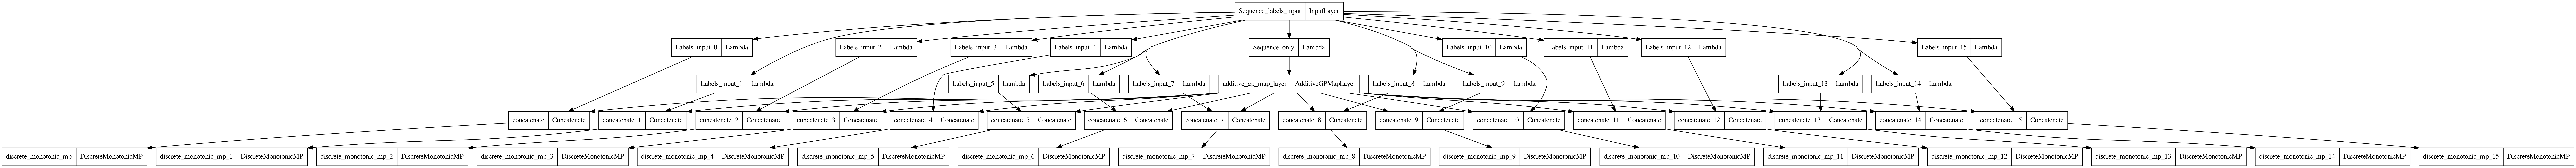

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=False,show_dtype=False,dpi=300,to_file='titeseq_dmr.png')

In [19]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=50,
          batch_size=400,
          try_tqdm = True,
          early_stopping=True,
          early_stopping_patience=5,
          linear_initialization=False)

0epoch [00:00, ?epoch/s]

Epoch 1/50
331/331 [==============================] - 22s 36ms/step - loss: 1165440.6250 - discrete_monotonic_mp_loss: 52260.4844 - discrete_monotonic_mp_1_loss: 47388.7930 - discrete_monotonic_mp_2_loss: 44795.2305 - discrete_monotonic_mp_3_loss: 58720.5078 - discrete_monotonic_mp_4_loss: 75759.9141 - discrete_monotonic_mp_5_loss: 61178.4180 - discrete_monotonic_mp_6_loss: 65213.1289 - discrete_monotonic_mp_7_loss: 74281.9141 - discrete_monotonic_mp_8_loss: 78950.3359 - discrete_monotonic_mp_9_loss: 92619.7109 - discrete_monotonic_mp_10_loss: 87482.8047 - discrete_monotonic_mp_11_loss: 91087.3750 - discrete_monotonic_mp_12_loss: 106872.0469 - discrete_monotonic_mp_13_loss: 76276.9453 - discrete_monotonic_mp_14_loss: 71663.1719 - discrete_monotonic_mp_15_loss: 80889.9609 - I_var: -0.5156 - val_loss: 1064891.1250 - val_discrete_monotonic_mp_loss: 46612.3516 - val_discrete_monotonic_mp_1_loss: 37866.1484 - val_discrete_monotonic_mp_2_loss: 36442.2148 - val_discrete_monotonic_mp_3_loss: 4

331/331 [==============================] - 7s 20ms/step - loss: 956243.0000 - discrete_monotonic_mp_loss: 41960.6250 - discrete_monotonic_mp_1_loss: 34061.5156 - discrete_monotonic_mp_2_loss: 31378.8105 - discrete_monotonic_mp_3_loss: 41860.7109 - discrete_monotonic_mp_4_loss: 65245.9102 - discrete_monotonic_mp_5_loss: 51079.8086 - discrete_monotonic_mp_6_loss: 57850.9961 - discrete_monotonic_mp_7_loss: 68907.4688 - discrete_monotonic_mp_8_loss: 71414.0156 - discrete_monotonic_mp_9_loss: 76920.5391 - discrete_monotonic_mp_10_loss: 71206.8594 - discrete_monotonic_mp_11_loss: 64539.3789 - discrete_monotonic_mp_12_loss: 92442.1094 - discrete_monotonic_mp_13_loss: 63547.2695 - discrete_monotonic_mp_14_loss: 60692.5273 - discrete_monotonic_mp_15_loss: 63134.2422 - I_var: -0.0214 - val_loss: 949758.3750 - val_discrete_monotonic_mp_loss: 43437.2188 - val_discrete_monotonic_mp_1_loss: 32810.7031 - val_discrete_monotonic_mp_2_loss: 31146.0371 - val_discrete_monotonic_mp_3_loss: 41754.6328 - val

331/331 [==============================] - 7s 20ms/step - loss: 773154.8125 - discrete_monotonic_mp_loss: 41821.3242 - discrete_monotonic_mp_1_loss: 33718.8594 - discrete_monotonic_mp_2_loss: 31001.0840 - discrete_monotonic_mp_3_loss: 41371.0352 - discrete_monotonic_mp_4_loss: 61885.0625 - discrete_monotonic_mp_5_loss: 47203.7148 - discrete_monotonic_mp_6_loss: 47186.2422 - discrete_monotonic_mp_7_loss: 53746.7969 - discrete_monotonic_mp_8_loss: 53247.8477 - discrete_monotonic_mp_9_loss: 54575.4258 - discrete_monotonic_mp_10_loss: 51985.1680 - discrete_monotonic_mp_11_loss: 47509.9609 - discrete_monotonic_mp_12_loss: 71223.5234 - discrete_monotonic_mp_13_loss: 47731.9727 - discrete_monotonic_mp_14_loss: 44099.0195 - discrete_monotonic_mp_15_loss: 44847.5391 - I_var: 0.4776 - val_loss: 771088.9375 - val_discrete_monotonic_mp_loss: 43311.3203 - val_discrete_monotonic_mp_1_loss: 32468.3770 - val_discrete_monotonic_mp_2_loss: 30787.7559 - val_discrete_monotonic_mp_3_loss: 41346.1250 - val_

331/331 [==============================] - 7s 20ms/step - loss: 710963.7500 - discrete_monotonic_mp_loss: 41172.6719 - discrete_monotonic_mp_1_loss: 33334.5586 - discrete_monotonic_mp_2_loss: 30702.0371 - discrete_monotonic_mp_3_loss: 41137.8359 - discrete_monotonic_mp_4_loss: 60760.2383 - discrete_monotonic_mp_5_loss: 45721.9688 - discrete_monotonic_mp_6_loss: 41928.7109 - discrete_monotonic_mp_7_loss: 47809.9531 - discrete_monotonic_mp_8_loss: 48120.2656 - discrete_monotonic_mp_9_loss: 48557.7656 - discrete_monotonic_mp_10_loss: 46162.9102 - discrete_monotonic_mp_11_loss: 41983.6328 - discrete_monotonic_mp_12_loss: 61441.1094 - discrete_monotonic_mp_13_loss: 43349.0156 - discrete_monotonic_mp_14_loss: 39324.8516 - discrete_monotonic_mp_15_loss: 39455.5039 - I_var: 0.6237 - val_loss: 733565.1250 - val_discrete_monotonic_mp_loss: 42558.8672 - val_discrete_monotonic_mp_1_loss: 32149.2812 - val_discrete_monotonic_mp_2_loss: 30563.5352 - val_discrete_monotonic_mp_3_loss: 41250.8125 - val_

331/331 [==============================] - 7s 21ms/step - loss: 687090.8125 - discrete_monotonic_mp_loss: 40964.9883 - discrete_monotonic_mp_1_loss: 33257.1016 - discrete_monotonic_mp_2_loss: 30645.8359 - discrete_monotonic_mp_3_loss: 41071.5781 - discrete_monotonic_mp_4_loss: 60064.3750 - discrete_monotonic_mp_5_loss: 44784.8164 - discrete_monotonic_mp_6_loss: 40343.9141 - discrete_monotonic_mp_7_loss: 45520.3906 - discrete_monotonic_mp_8_loss: 46145.1133 - discrete_monotonic_mp_9_loss: 46436.7539 - discrete_monotonic_mp_10_loss: 44047.9648 - discrete_monotonic_mp_11_loss: 39920.1172 - discrete_monotonic_mp_12_loss: 56664.1211 - discrete_monotonic_mp_13_loss: 41939.8008 - discrete_monotonic_mp_14_loss: 37625.3203 - discrete_monotonic_mp_15_loss: 37658.1680 - I_var: 0.6709 - val_loss: 731975.1875 - val_discrete_monotonic_mp_loss: 42286.5898 - val_discrete_monotonic_mp_1_loss: 32106.8984 - val_discrete_monotonic_mp_2_loss: 30537.5449 - val_discrete_monotonic_mp_3_loss: 41278.6680 - val_

331/331 [==============================] - 7s 21ms/step - loss: 673805.0000 - discrete_monotonic_mp_loss: 40877.0664 - discrete_monotonic_mp_1_loss: 33213.3711 - discrete_monotonic_mp_2_loss: 30611.0977 - discrete_monotonic_mp_3_loss: 41004.3516 - discrete_monotonic_mp_4_loss: 59506.6172 - discrete_monotonic_mp_5_loss: 44082.2578 - discrete_monotonic_mp_6_loss: 39491.5859 - discrete_monotonic_mp_7_loss: 44299.4570 - discrete_monotonic_mp_8_loss: 44937.1836 - discrete_monotonic_mp_9_loss: 45081.9180 - discrete_monotonic_mp_10_loss: 42858.9961 - discrete_monotonic_mp_11_loss: 38556.2148 - discrete_monotonic_mp_12_loss: 54793.8789 - discrete_monotonic_mp_13_loss: 41246.8398 - discrete_monotonic_mp_14_loss: 36575.2305 - discrete_monotonic_mp_15_loss: 36668.5391 - I_var: 0.6987 - val_loss: 686986.6875 - val_discrete_monotonic_mp_loss: 42200.3594 - val_discrete_monotonic_mp_1_loss: 32093.3711 - val_discrete_monotonic_mp_2_loss: 30490.6289 - val_discrete_monotonic_mp_3_loss: 41154.6523 - val_

331/331 [==============================] - 6s 19ms/step - loss: 662289.3125 - discrete_monotonic_mp_loss: 40840.3086 - discrete_monotonic_mp_1_loss: 33185.6836 - discrete_monotonic_mp_2_loss: 30583.0176 - discrete_monotonic_mp_3_loss: 40952.1875 - discrete_monotonic_mp_4_loss: 59044.5625 - discrete_monotonic_mp_5_loss: 43504.9727 - discrete_monotonic_mp_6_loss: 38764.8320 - discrete_monotonic_mp_7_loss: 43134.5156 - discrete_monotonic_mp_8_loss: 43797.5391 - discrete_monotonic_mp_9_loss: 43768.1953 - discrete_monotonic_mp_10_loss: 41631.9297 - discrete_monotonic_mp_11_loss: 37494.0664 - discrete_monotonic_mp_12_loss: 53329.1055 - discrete_monotonic_mp_13_loss: 40745.4102 - discrete_monotonic_mp_14_loss: 35670.7422 - discrete_monotonic_mp_15_loss: 35841.8086 - I_var: 0.7202 - val_loss: 675547.0000 - val_discrete_monotonic_mp_loss: 42128.4688 - val_discrete_monotonic_mp_1_loss: 32072.9336 - val_discrete_monotonic_mp_2_loss: 30454.1934 - val_discrete_monotonic_mp_3_loss: 41088.8633 - val_

331/331 [==============================] - 6s 19ms/step - loss: 654194.8125 - discrete_monotonic_mp_loss: 40806.7383 - discrete_monotonic_mp_1_loss: 33159.5938 - discrete_monotonic_mp_2_loss: 30554.1191 - discrete_monotonic_mp_3_loss: 40914.3906 - discrete_monotonic_mp_4_loss: 58800.9102 - discrete_monotonic_mp_5_loss: 43131.5000 - discrete_monotonic_mp_6_loss: 38455.9102 - discrete_monotonic_mp_7_loss: 42409.6094 - discrete_monotonic_mp_8_loss: 42982.7891 - discrete_monotonic_mp_9_loss: 42786.6367 - discrete_monotonic_mp_10_loss: 40855.2656 - discrete_monotonic_mp_11_loss: 36793.0195 - discrete_monotonic_mp_12_loss: 52080.1055 - discrete_monotonic_mp_13_loss: 40369.6719 - discrete_monotonic_mp_14_loss: 34922.6875 - discrete_monotonic_mp_15_loss: 35171.3281 - I_var: 0.7386 - val_loss: 672605.7500 - val_discrete_monotonic_mp_loss: 42083.2969 - val_discrete_monotonic_mp_1_loss: 32051.5820 - val_discrete_monotonic_mp_2_loss: 30433.9316 - val_discrete_monotonic_mp_3_loss: 41106.7695 - val_

331/331 [==============================] - 6s 19ms/step - loss: 646742.5000 - discrete_monotonic_mp_loss: 40792.6406 - discrete_monotonic_mp_1_loss: 33137.6602 - discrete_monotonic_mp_2_loss: 30534.7539 - discrete_monotonic_mp_3_loss: 40883.4961 - discrete_monotonic_mp_4_loss: 58611.5312 - discrete_monotonic_mp_5_loss: 42838.9844 - discrete_monotonic_mp_6_loss: 38159.7891 - discrete_monotonic_mp_7_loss: 41776.1562 - discrete_monotonic_mp_8_loss: 42205.8477 - discrete_monotonic_mp_9_loss: 41834.0195 - discrete_monotonic_mp_10_loss: 40190.8867 - discrete_monotonic_mp_11_loss: 36155.6562 - discrete_monotonic_mp_12_loss: 50854.8086 - discrete_monotonic_mp_13_loss: 39939.6250 - discrete_monotonic_mp_14_loss: 34270.6680 - discrete_monotonic_mp_15_loss: 34555.3789 - I_var: 0.7550 - val_loss: 662659.8750 - val_discrete_monotonic_mp_loss: 42072.1094 - val_discrete_monotonic_mp_1_loss: 32059.9180 - val_discrete_monotonic_mp_2_loss: 30381.5742 - val_discrete_monotonic_mp_3_loss: 41014.7578 - val_

331/331 [==============================] - 6s 19ms/step - loss: 641255.1875 - discrete_monotonic_mp_loss: 40776.4805 - discrete_monotonic_mp_1_loss: 33126.1055 - discrete_monotonic_mp_2_loss: 30518.5098 - discrete_monotonic_mp_3_loss: 40848.8008 - discrete_monotonic_mp_4_loss: 58515.9375 - discrete_monotonic_mp_5_loss: 42667.9727 - discrete_monotonic_mp_6_loss: 38015.3086 - discrete_monotonic_mp_7_loss: 41385.5352 - discrete_monotonic_mp_8_loss: 41708.4648 - discrete_monotonic_mp_9_loss: 41112.2383 - discrete_monotonic_mp_10_loss: 39630.7422 - discrete_monotonic_mp_11_loss: 35672.6719 - discrete_monotonic_mp_12_loss: 50027.2031 - discrete_monotonic_mp_13_loss: 39465.8945 - discrete_monotonic_mp_14_loss: 33742.4453 - discrete_monotonic_mp_15_loss: 34040.3008 - I_var: 0.7695 - val_loss: 654391.2500 - val_discrete_monotonic_mp_loss: 42018.9648 - val_discrete_monotonic_mp_1_loss: 32028.9902 - val_discrete_monotonic_mp_2_loss: 30350.6797 - val_discrete_monotonic_mp_3_loss: 40985.3398 - val_

On test data:


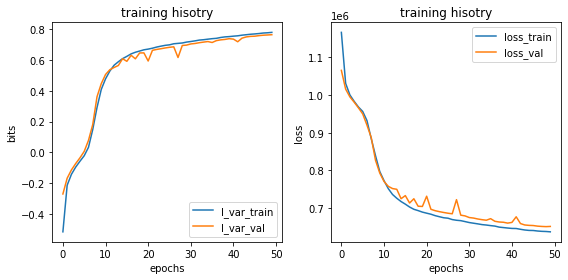

In [20]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [21]:
model.history['loss'][-1]/1e6

0.6377449375

In [22]:
phi = gpmap.x_to_phi(x_test)

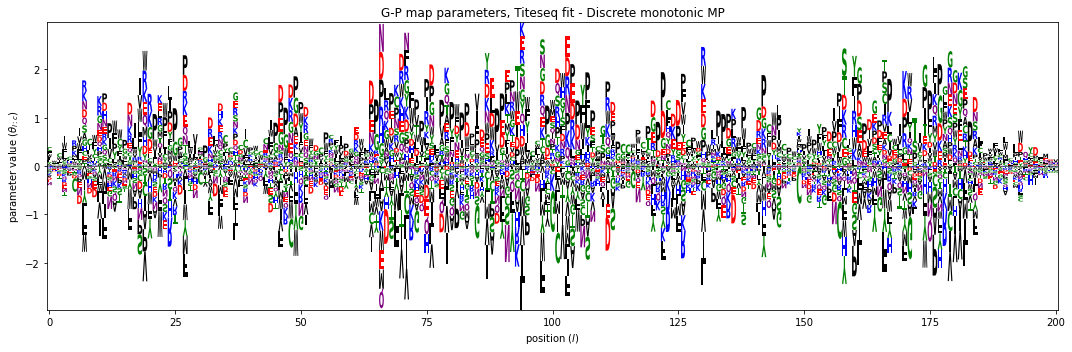

In [23]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True,color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters, Titeseq fit - Discrete monotonic MP')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_DM-MP.png',dpi=300,bbox_inches='tight')
plt.show()

In [24]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

In [25]:
theta_raw_df = pd.DataFrame(theta,columns=alphabet)

In [26]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_single_mut_df.head(22)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
5,1,331,N,G,N331G,N1G,-0.06,-0.02,-0.04,-0.21,-0.29,-0.25
6,1,331,N,H,N331H,N1H,0.01,-0.05,-0.02,-0.86,-0.36,-0.61
7,1,331,N,I,N331I,N1I,-0.06,-0.08,-0.07,-1.05,-0.65,-0.85
8,1,331,N,K,N331K,N1K,-0.01,-0.01,-0.01,-0.17,-0.24,-0.20
9,1,331,N,L,N331L,N1L,-0.08,-0.01,-0.05,-0.81,-0.69,-0.75


In [27]:

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_lib1'].values[0:20]




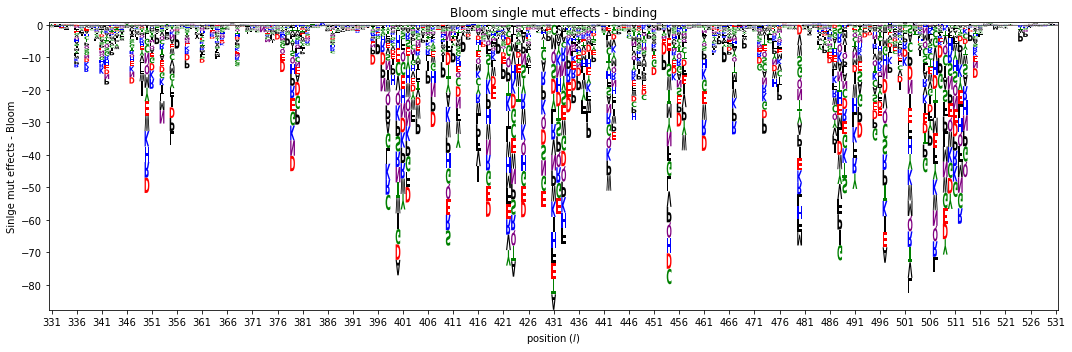

In [28]:
# Get G-P map parameters in matrix form
# theta = np.squeeze(gpmap.weights[1].numpy())

# # Create grid in phi space
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(bloom_bind_df.fillna(0), ax=ax,center_values=False, color_scheme='chemistry')
ax.set_ylabel('Sinlge mut effects - Bloom')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Bloom single mut effects - binding')
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only.png',dpi=300,bbox_inches='tight')
plt.show()

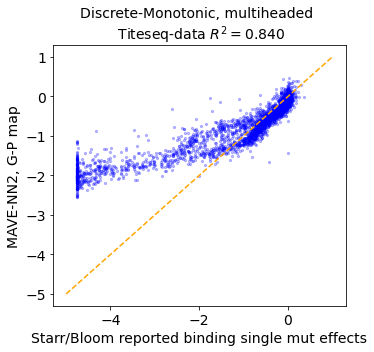

In [76]:
plt.figure(figsize=(5,5))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, 2.2*theta_lc_consensus_df.values,s=5,alpha=0.25,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='orange')
plt.xlabel('Starr/Bloom reported binding single mut effects',fontsize=14)
plt.title(f'Discrete-Monotonic, multiheaded \n Titeseq-data $R^2 = {Rsq:.3f}$',fontsize=14)
plt.ylabel('MAVE-NN2, G-P map',fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(f'{path_to_packet}/mavenn_bloom_binding_comparison_DM.png',dpi=200,bbox_inches='tight')

In [30]:
#theta_lc_consensus_df.to_csv('discrete_monotonic_ace2rbd_binding.csv',index=False)

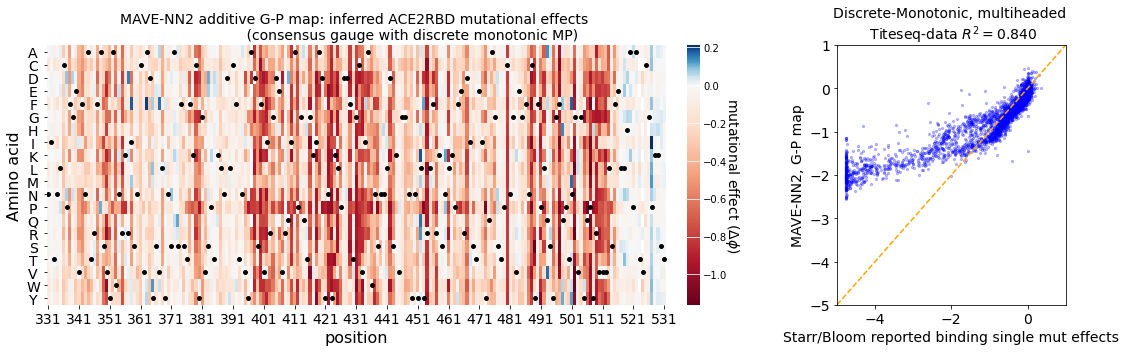

In [75]:

# Create figure
fig, axs = plt.subplots(1,2, figsize=(15,5),gridspec_kw={'width_ratios': [1, 0.35]})

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-3,1],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position',fontsize=16)
heatmap_ax.set_ylabel('Amino acid',fontsize=16)
heatmap_ax.set_title(f'MAVE-NN2 additive G-P map: inferred ACE2RBD mutational effects \n \
                        (consensus gauge with discrete monotonic MP)',fontsize=14)
heatmap_ax.set_yticklabels(alphabet,fontsize=14)
heatmap_ax.set_xticks(np.arange(0,201,10))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,10)],fontsize=14)

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center',fontsize=14)

ax = axs[1]

Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, 2.2*theta_lc_consensus_df.values,s=5,alpha=0.25,color='blue')

lims = [-5,1]
ax.plot(lims,lims,'--',color='orange')
ax.set_xlabel('Starr/Bloom reported binding single mut effects',fontsize=14)
ax.set_title(f'Discrete-Monotonic, multiheaded \n Titeseq-data $R^2 = {Rsq:.3f}$',fontsize=14)
ax.set_ylabel('MAVE-NN2, G-P map',fontsize=14)
ax.tick_params(labelsize=14)
ax.set_ylim(lims)
ax.set_xlim(lims)

# plt.savefig(f'{path_to_packet}/mavenn_bloom_binding_comparison_DM.png',dpi=200,bbox_inches='tight')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig(f'{path_to_packet}/ace2rbd_discrete_monotonic_GPmap_fit_to_Titeseq_and_comp_to_Bloom_bind.png',
            dpi=300,bbox_inches='tight')

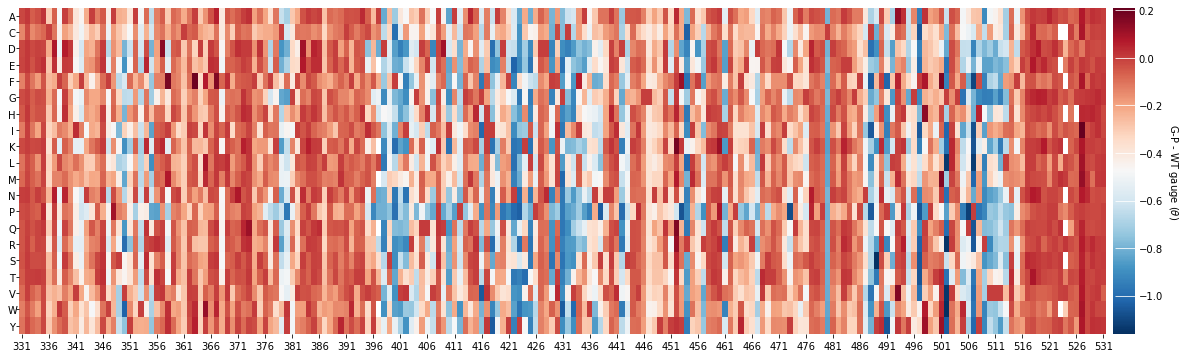

In [31]:

# # Create fig and ax objects
fig, ax = plt.subplots(figsize=[20,6])

# Draw heatmap
ax, cb = mavenn.heatmap(values=theta_lc,
                        alphabet='protein',
                        ax=ax,
                        #gpmap_type='additive',
                        cmap='RdBu_r',
                        cmap_size='2%')

# Style heatmap
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
#ax.set_xlabel('nucleotide position', labelpad=5)

# Style colorbar
cb.set_label('G-P - WT gauge ($\\theta$)',
             labelpad=10, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [32]:
np.save('titeseq_gpmap_discrete_monotonic',logo.df.values.ravel())

In [33]:
sortseq_gpmap = np.load('sortseq_gpmap_monotonic_agnostic.npy')
titeseq_gpmap = np.load('titeseq_gpmap_discrete_monotonic.npy')

In [34]:
# plt.figure(figsize=(5,5))
# # Compute R^2 between yhat_test and y_test
# Rsq = np.corrcoef(sortseq_gpmap,titeseq_gpmap)[0, 1]**2

# # Style plot
# xlim = [-1.5, 1.5]

# plt.scatter(sortseq_gpmap,titeseq_gpmap,s=4,color='blue',alpha=0.2)
# plt.xlabel('Sortseq G-P map parameters')
# plt.ylabel('Titeseq G-P map parameters')
# plt.title(f'$R^2$={Rsq:.3}');
# plt.plot(xlim, xlim, '--', color='k', label='diagonal')
# plt.xlim(xlim)
# plt.ylim(xlim)
# plt.show()

In [44]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

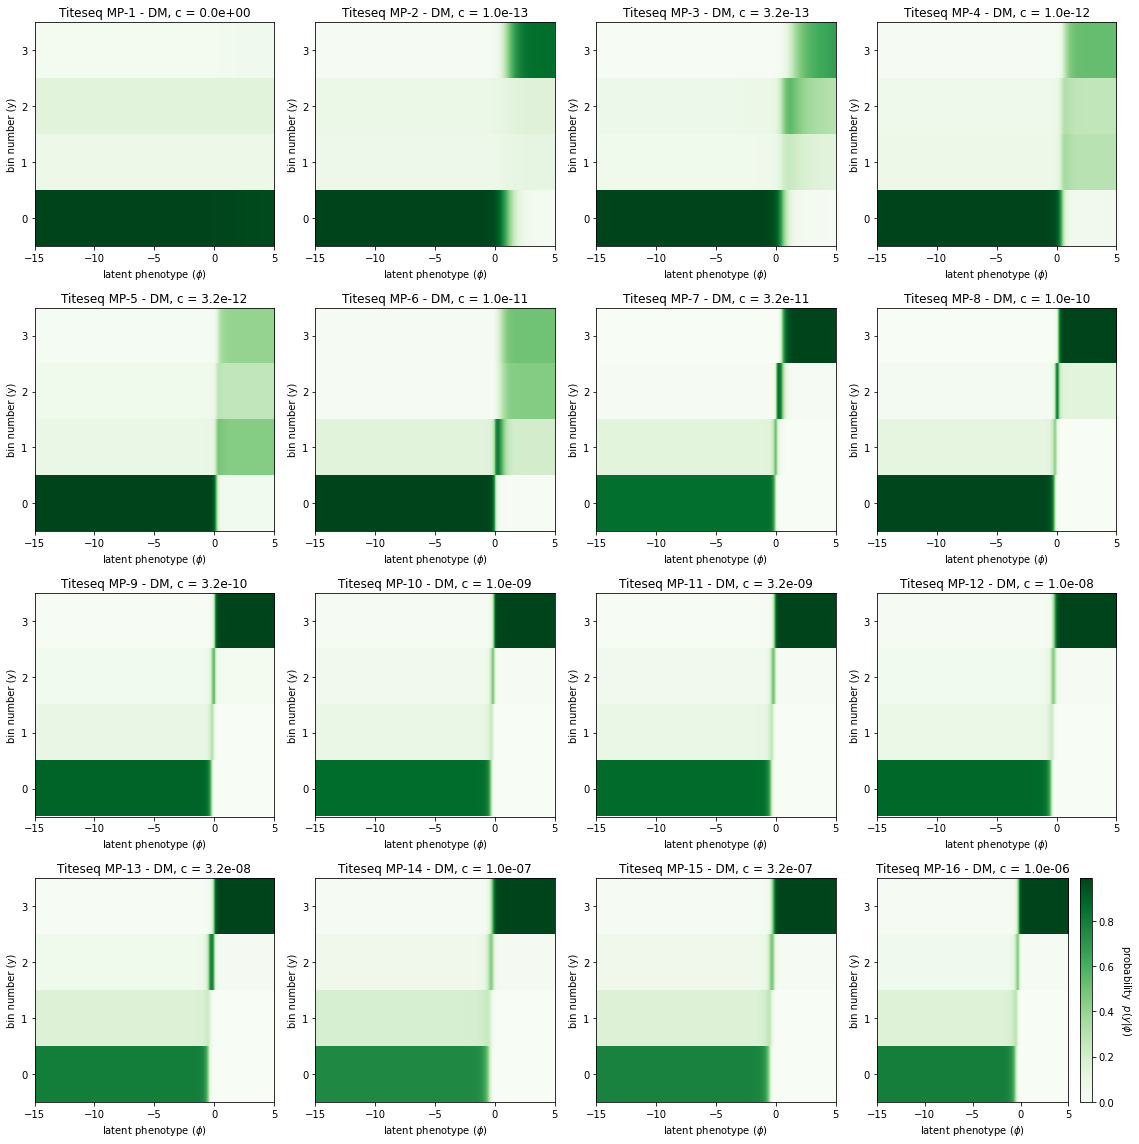

In [46]:
# Create grid in phi space
phi_lim = [-15, 5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1} - DM, c = {(cs[mp_counter]):.1e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig(f'{path_to_packet}/ace2rbd_discrete_monotonic_MP_fit_to_Titeseq.png',
            dpi=300,bbox_inches='tight')


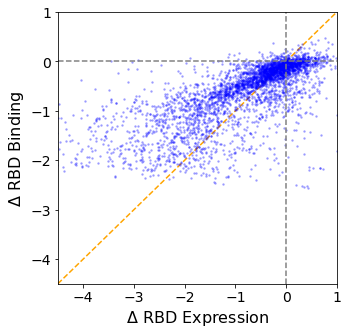

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(np.load('sortseq_gpmap_monotonic_agnostic_consensus.npy').ravel(),
            2.2*theta_lc_consensus_df.values,
           s=2.5,
           alpha=0.25,
           color='blue')
plt.xlim(-4.5,1)
plt.ylim(-4.5,1)

lims = [-4.5,1]

plt.plot(lims,lims,'--',color='orange',zorder=-2)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.xlabel('$\Delta$ RBD Expression',fontsize=16)
plt.ylabel('$\\Delta$ RBD Binding',fontsize=16)
plt.tick_params(labelsize=14)
plt.savefig('binding_vs_expression.png',dpi=200,bbox_inches='tight')

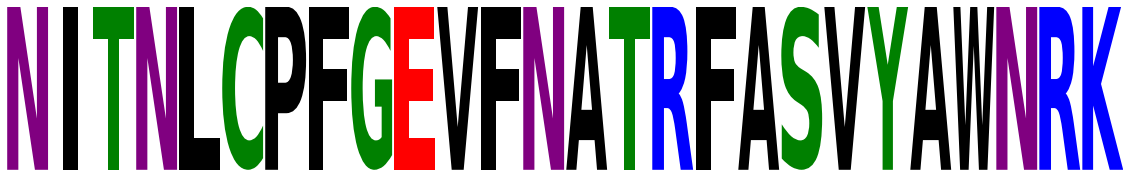

In [37]:
#model.x_consensus
fig, ax = plt.subplots(figsize=(20,3))
logomaker.Logo(logomaker.sequence_to_matrix(model.x_consensus).loc[0:25],color_scheme='chemistry',ax=ax)
ax.set_yticks([])
ax.set_xticks([])
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.savefig('rbd_seq_1.png',dpi=200,bbox_inches='tight')

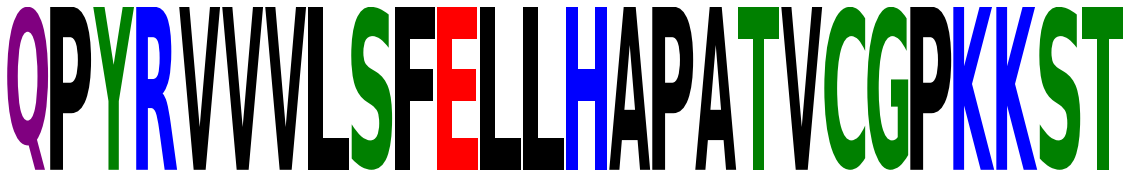

In [38]:
#model.x_consensus
fig, ax = plt.subplots(figsize=(20,3))
logomaker.Logo(logomaker.sequence_to_matrix(model.x_consensus).loc[175:],color_scheme='chemistry',ax=ax)
ax.set_yticks([])
ax.set_xticks([])
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

fig.savefig('rbd_seq_2.png',dpi=200,bbox_inches='tight')

In [39]:
!pwd

/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn/mavenn/development_mavenn2/ace2rbd


In [40]:
x = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

x = np.array(x)[::-1]
def sigmoid(x,kd,a=2,b=0.):
    

    return (a*x)/(x+kd)+b

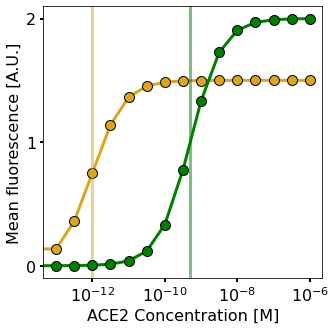

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,sigmoid(x,kd=1e-12,a=1.5),'o-',color='goldenrod',ms=10,lw=3,markeredgecolor='black')
ax.axvline(1e-12,lw=3,color='goldenrod',alpha=0.5)
ax.plot(x,sigmoid(x,kd=5e-10),'o-',color='green',ms=10,lw=3,markeredgecolor='black')
ax.axvline(5e-10,lw=3,color='green',alpha=0.5)
ax.set_xscale('log')
ax.tick_params(labelsize=16)
ax.set_yticks([0,1,2])
ax.set_xlabel('ACE2 Concentration [M]',fontsize=16)
ax.set_ylabel('Mean fluorescence [A.U.]',fontsize=16)
ax.tick_params(which='both', width=2)
#ax.tick_params(which='minor', length=0.5)
fig.savefig('titration_curves.png',dpi=200,bbox_inches='tight')